shuronデータベースにあるmorphテーブルの形態素解析結果からコーパスを作成する

In [1]:
from pymongo import MongoClient
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from bson.objectid import ObjectId

table="morph"

client = MongoClient('mongodb://localhost:27017/')
db = client.shuron

dic = corpora.Dictionary([])
corpus = []
for qa in db[table].find({"nmorpy": {"$gte": 20}}):
    newdic = corpora.Dictionary([qa['words']])
    dic.merge_with(newdic)
    corpus.extend([dic.doc2bow(qa['words'])])

LDAトピックモデルを作成

In [2]:
lda = LdaModel(corpus = corpus, num_topics = 20, id2word = dic)

各トピックが属するトピックを決めてデータベースに書き込む

In [3]:
from pymongo import MongoClient
from gensim import corpora
from gensim.models.ldamodel import LdaModel

table="morph"
client = MongoClient('mongodb://localhost:27017/')
db = client.shuron

for qa in db[table].find({"nmorpy": {"$gte": 20}}):
    c = dic.doc2bow(qa['words'])
    maxprob = -1.0
    maxtopic = 0
    for topics in lda[c]:
        if topics[1] > float(maxprob):
            maxtopic = topics[0]
            maxprob  = topics[1]
    qa['maxprob'] = str(maxprob)
    qa['maxtopic'] = maxtopic
    db[table].replace_one({'_id': ObjectId(qa['_id'])},qa)

ワードクラウド作成

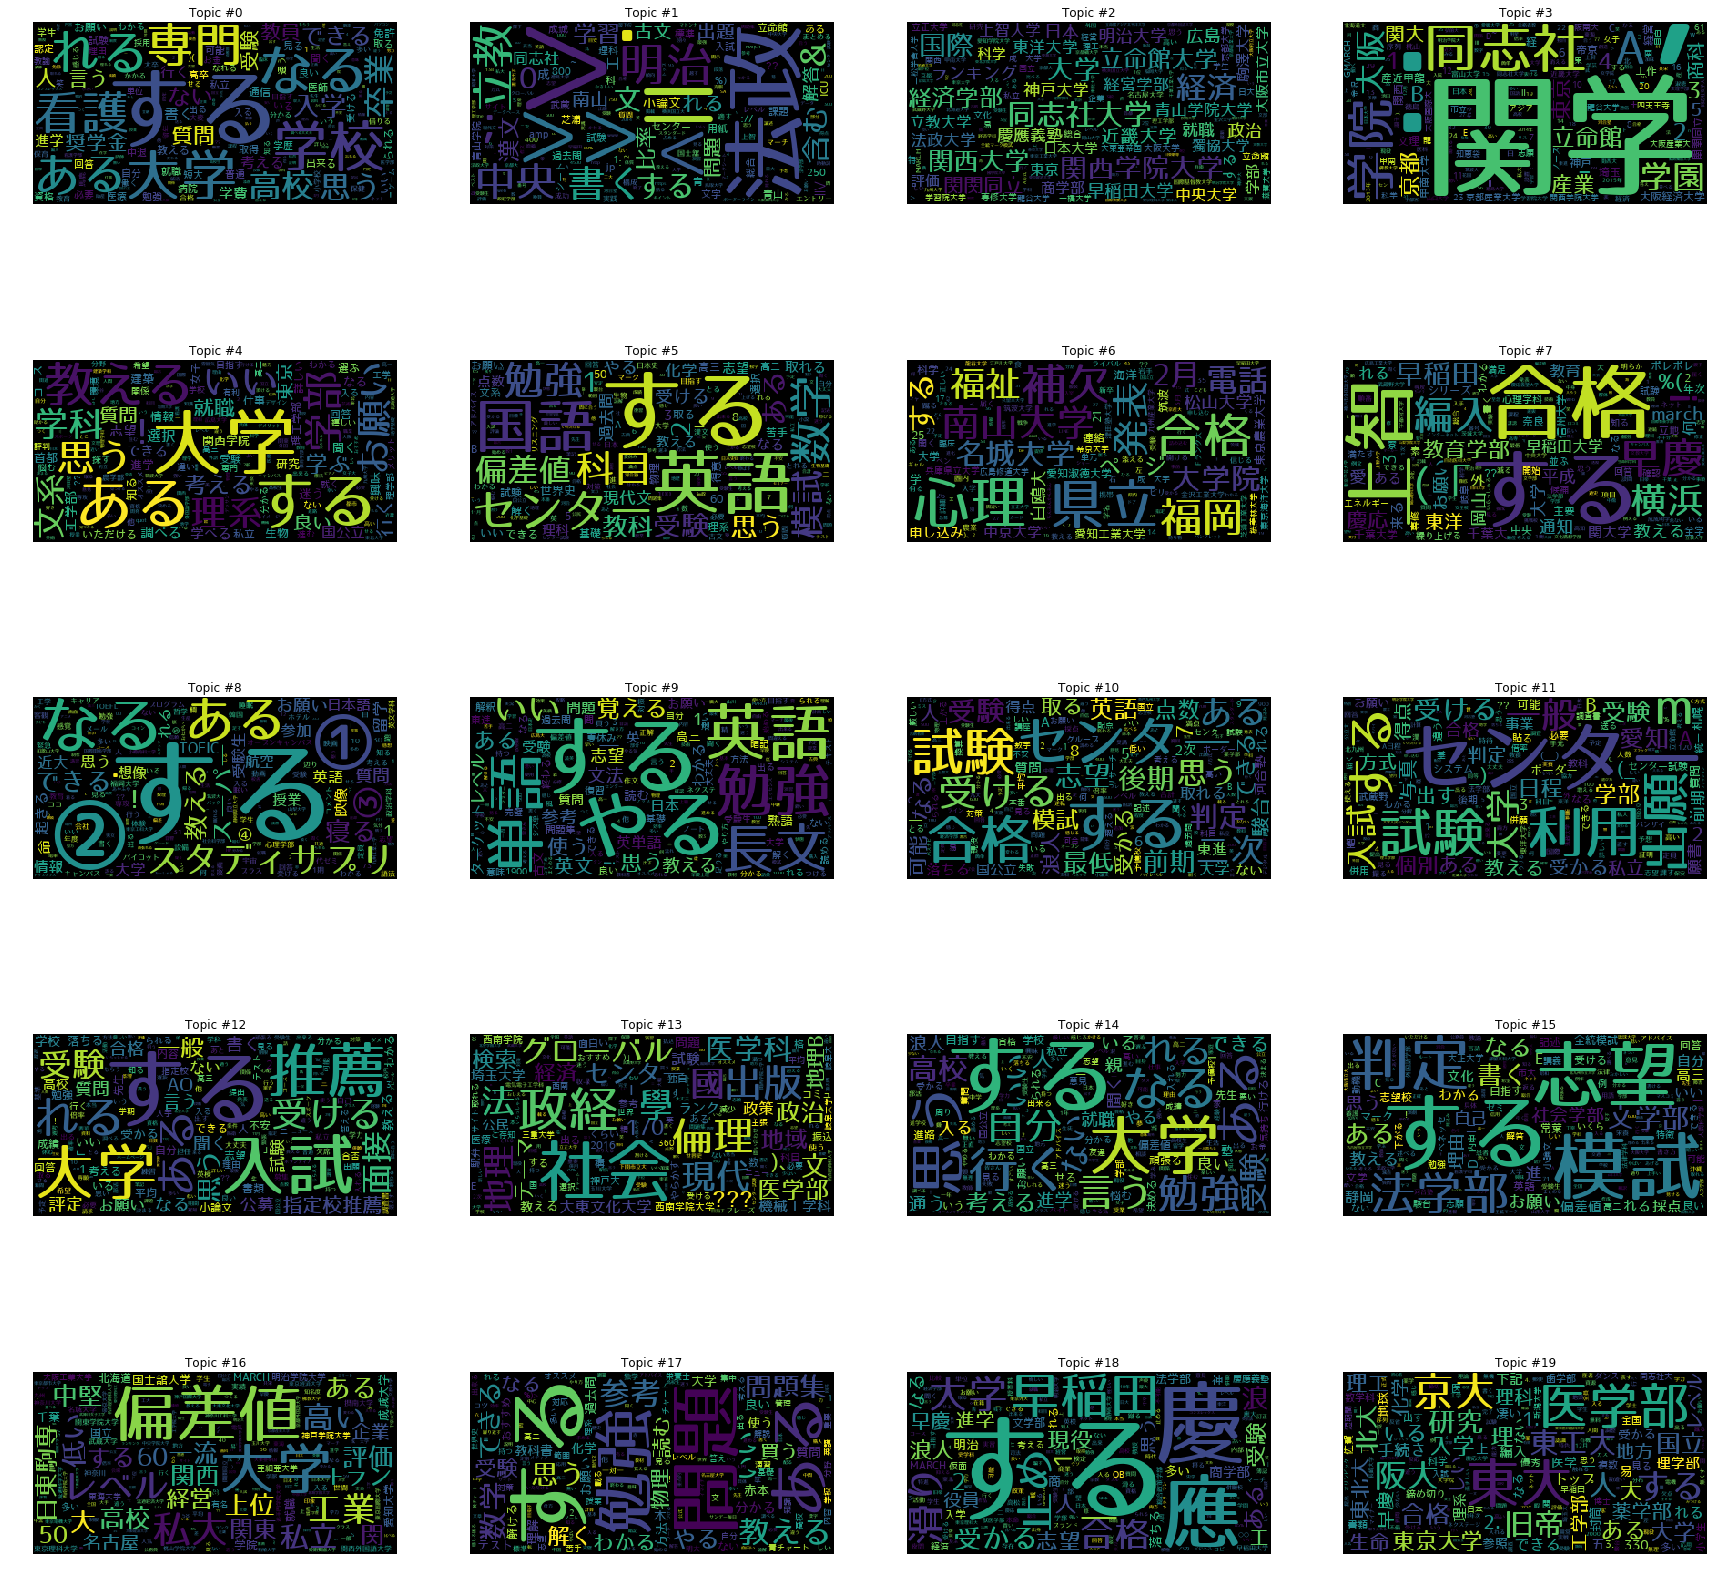

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
for t in range(0,20):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    fpath = "C:\\Users\\katsu\\Anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\fonts\\ttf\\07LogoTypeGothic7.ttf"
    wc = WordCloud(font_path = fpath)
    im = wc.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

トピックをわける単語の出力

In [7]:
for i in range(20):
    print(i, end=",")
    for t in lda.show_topic(i, 30):
        print(f'{t[0]}:{t[1]}', end=" ")
    print()

0,する:0.09779088199138641 学校:0.027740614488720894 大学:0.02729835733771324 なる:0.026620935648679733 れる:0.020178761333227158 専門:0.01969360187649727 看護:0.019199492409825325 ある:0.01900963857769966 高校:0.012689377181231976 卒業:0.012445800006389618 思う:0.011064901947975159 入学:0.01101519912481308 できる:0.007958455011248589 ない:0.00747142406180501 質問:0.0068428092636168 人:0.0066257016733288765 受験:0.006030967924743891 奨学金:0.005926051642745733 教員:0.005537403281778097 言う:0.005515551660209894 考える:0.0053120944648981094 書く:0.0051860567182302475 学費:0.004991214722394943 進学:0.004763631150126457 行く:0.00473775714635849 お願い:0.004631367977708578 免許:0.004466654732823372 教える:0.0044411830604076385 通信:0.004378101322799921 いい:0.004150037653744221 
1,>:0.08851401507854462 =:0.04543909803032875 >>:0.028011111542582512 法政:0.023743685334920883 .:0.02337713912129402 <:0.020123226568102837 明治:0.019190091639757156 ;:0.017872674390673637 立教:0.017421195283532143 中央:0.017181141301989555 書く:0.01499147154390812 &:0.01305213477462530

shuronデータベースにあるmorphテーブルの形態素解析結果からコーパスを作成する

In [8]:
from pymongo import MongoClient
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from bson.objectid import ObjectId

table="morph"

client = MongoClient('mongodb://localhost:27017/')
db = client.shuron

dic = corpora.Dictionary([])
corpus = []
for qa in db[table].find({"nmorpy": {"$gte": 20}}):
    newdic = corpora.Dictionary([qa['words']])
    dic.merge_with(newdic)
    corpus.extend([dic.doc2bow(qa['words'])])

In [ ]:
LDAトピックモデルを作成

In [9]:
lda = LdaModel(corpus = corpus, num_topics = 20, id2word = dic)

各トピックが属するトピックを決めてデータベースに書き込む

In [10]:
from pymongo import MongoClient
from gensim import corpora
from gensim.models.ldamodel import LdaModel

table="morph"
client = MongoClient('mongodb://localhost:27017/')
db = client.shuron

for qa in db[table].find({"nmorpy": {"$gte": 20}}):
    c = dic.doc2bow(qa['words'])
    maxprob = -1.0
    maxtopic = 0
    for topics in lda[c]:
        if topics[1] > float(maxprob):
            maxtopic = topics[0]
            maxprob  = topics[1]
    qa['maxprob'] = str(maxprob)
    qa['maxtopic'] = maxtopic
    db[table].replace_one({'_id': ObjectId(qa['_id'])},qa)

ワードクラウド作成

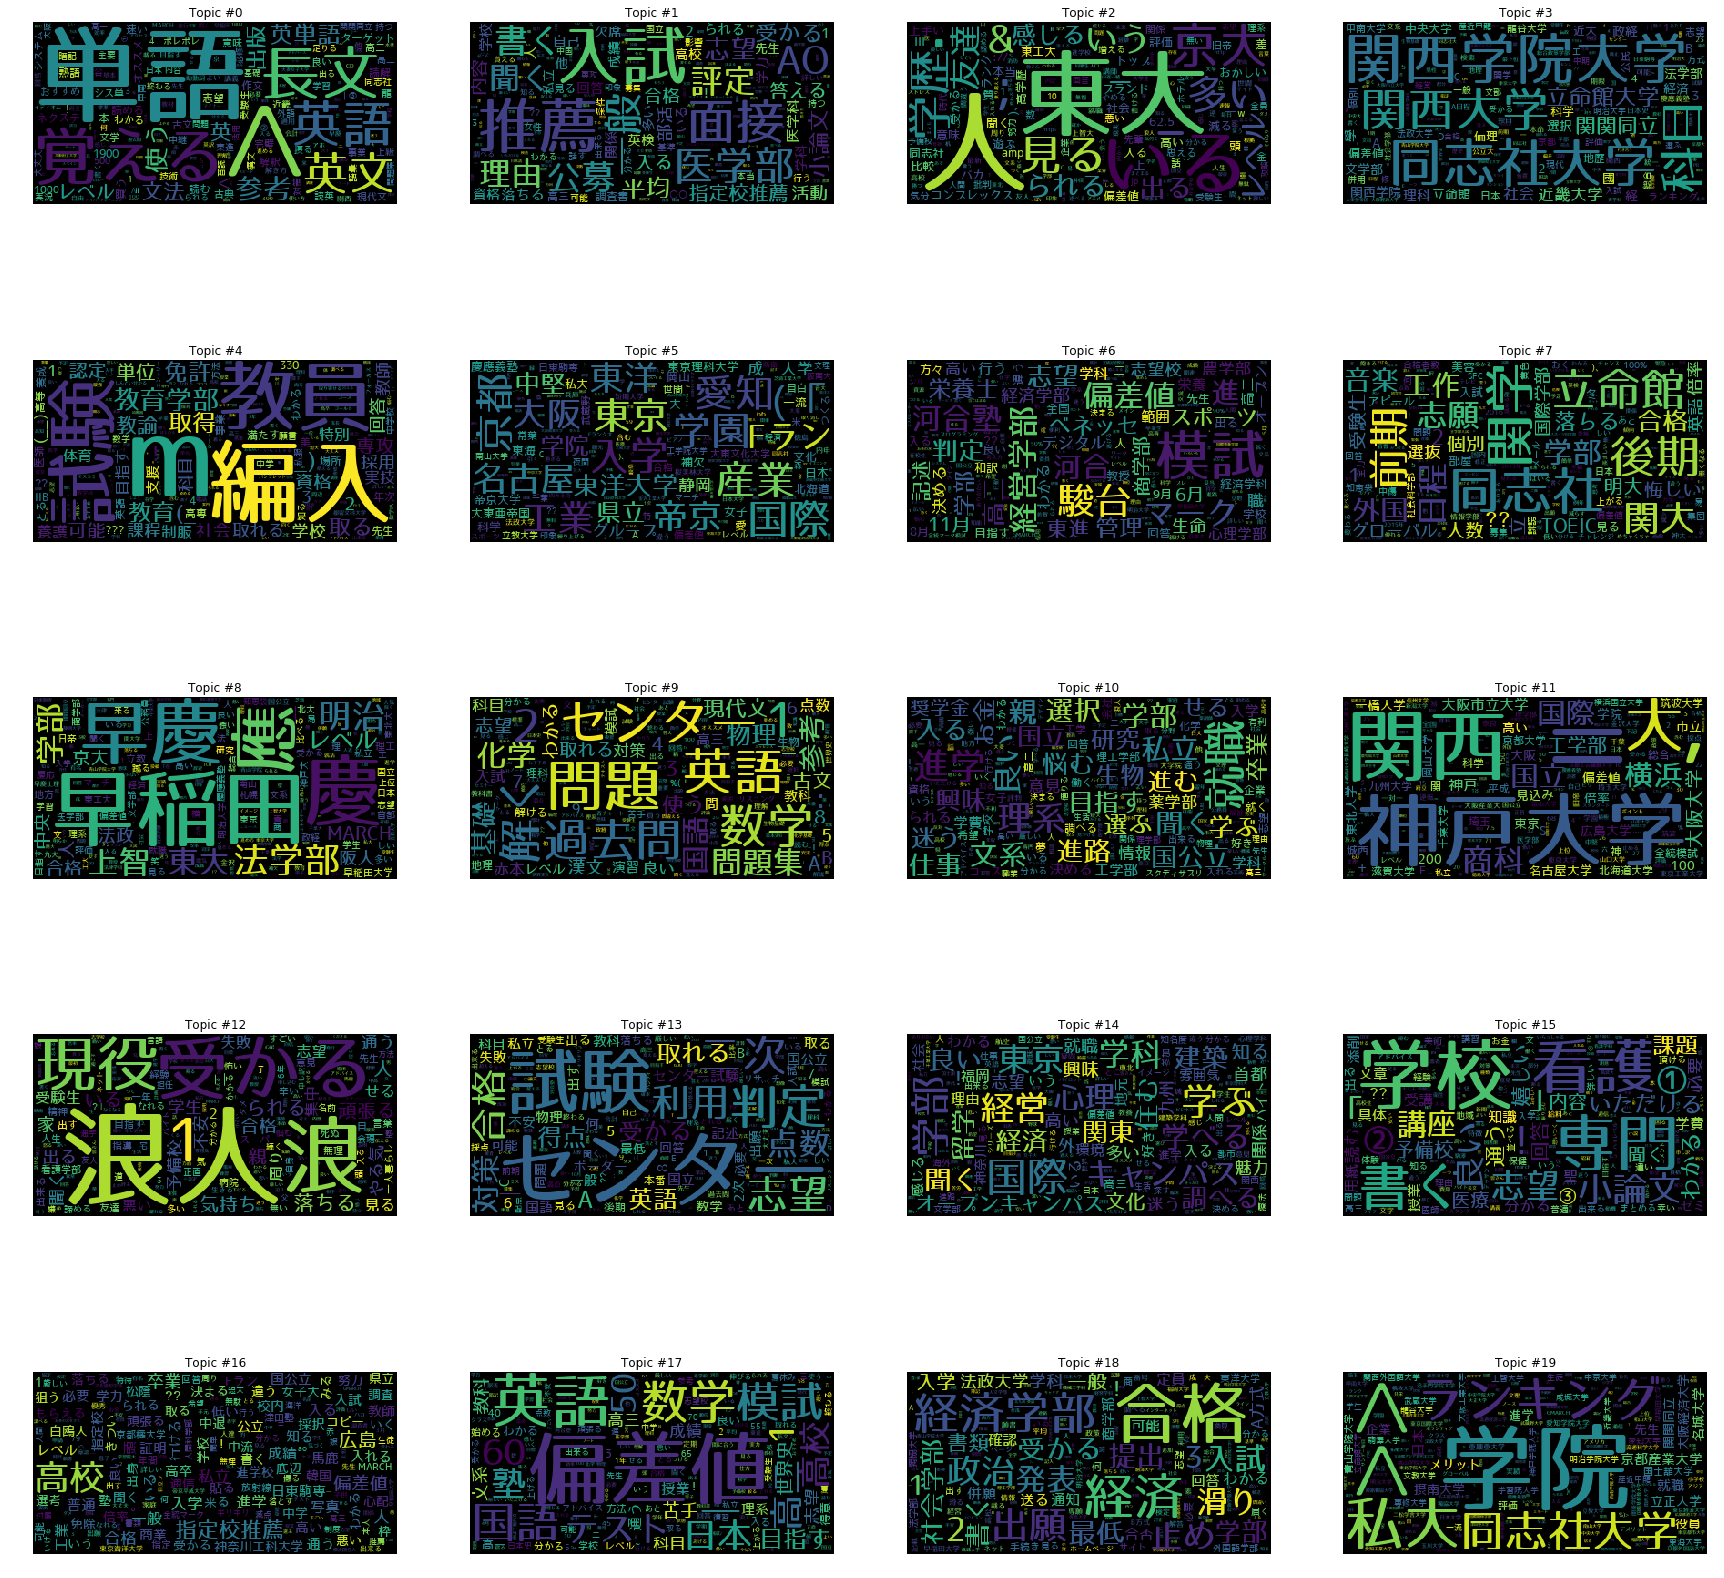

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
for t in range(0,20):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    fpath = "C:\\Users\\katsu\\Anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\fonts\\ttf\\07LogoTypeGothic7.ttf"
    wc = WordCloud(font_path = fpath)
    im = wc.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

トピックをわける単語の出力

In [12]:
for i in range(20):
    print(i, end=",")
    for t in lda.show_topic(i, 30):
        print(f'{t[0]}:{t[1]}', end=" ")
    print()

0,>:0.06866446882486343 単語:0.04590820521116257 覚える:0.029758572578430176 長文:0.026422804221510887 英語:0.02627359889447689 英文:0.023117845878005028 参考:0.022308707237243652 使う:0.017692826688289642 英単語:0.01606816053390503 出版:0.014770733192563057 英:0.014522652141749859 文法:0.013926250860095024 <:0.013213863596320152 レベル:0.012792631983757019 ターゲット:0.012756106443703175 本:0.01209582481533289 読む:0.011898485012352467 熟語:0.011134851723909378 志望:0.010451780632138252 読解:0.009724440984427929 解釈:0.00933115929365158 買う:0.008708709850907326 !:0.008235004730522633 1900:0.00778502132743597 速い:0.0073890602216124535 作文:0.006815487053245306 読める:0.006682385690510273 ネクステ:0.006517353933304548 オススメ:0.006134457886219025 現代文:0.0058494675904512405 
1,入試:0.08161887526512146 推薦:0.06942387670278549 面接:0.041844937950372696 一般:0.029692962765693665 医学部:0.027640677988529205 AO:0.02659592218697071 公募:0.01982792466878891 書く:0.019262084737420082 評定:0.018077079206705093 理由:0.017386851832270622 聞く:0.016512805595993996 志望:0.01133

2015年度月毎トピック占有率のクラスタリング

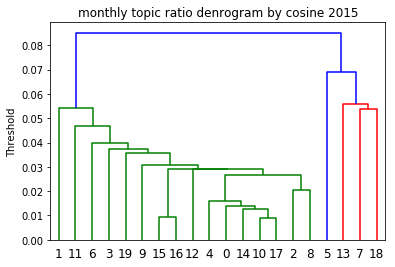

In [49]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import sys
import csv
import math

ar = np.zeros((200, 10, 12)) # 200トピック10年分12カ月で仮置き
#ar = np.zeros((20, 4)) # 一年分

df = pd.read_csv("month.csv")

offset = 0
label = []
rate = []
for i in range(20):
    d = df["{}".format(i)]
    label.append("{}".format(i))
    l = []
    for j in range(offset, offset + 12):
        l.append(d[j])
    rate.append(l)

result = linkage(rate, metric = 'cosine', method = 'single')
dendrogram(result,labels=label)
plt.title("monthly topic ratio denrogram by cosine 2015")
plt.ylabel("Threshold")
plt.show() 

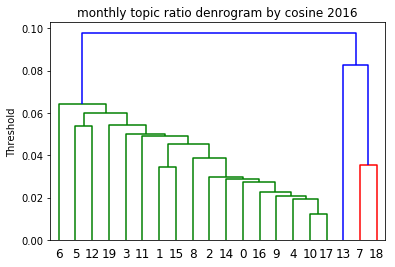

In [50]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import sys
import csv
import math

ar = np.zeros((200, 10, 12)) # 200トピック10年分12カ月で仮置き
#ar = np.zeros((20, 4)) # 一年分

df = pd.read_csv("month.csv")

offset = 12
label = []
rate = []
for i in range(20):
    d = df["{}".format(i)]
    label.append("{}".format(i))
    l = []
    for j in range(offset, offset + 12):
        l.append(d[j])
    rate.append(l)

result = linkage(rate, metric = 'cosine', method = 'single')
dendrogram(result,labels=label)
plt.title("monthly topic ratio denrogram by cosine 2016")
plt.ylabel("Threshold")
plt.show() 

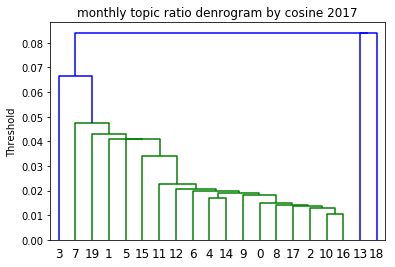

In [51]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import sys
import csv
import math

ar = np.zeros((200, 10, 12)) # 200トピック10年分12カ月で仮置き
#ar = np.zeros((20, 4)) # 一年分

df = pd.read_csv("month.csv")

offset = 24
label = []
rate = []
for i in range(20):
    d = df["{}".format(i)]
    label.append("{}".format(i))
    l = []
    for j in range(offset, offset + 12):
        l.append(d[j])
    rate.append(l)

result = linkage(rate, metric = 'cosine', method = 'single')
dendrogram(result,labels=label)
plt.title("monthly topic ratio denrogram by cosine 2017")
plt.ylabel("Threshold")
plt.show() 

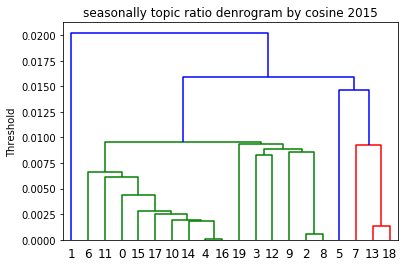

In [55]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import sys
import csv
import math

#ar = np.zeros((200, 10, 12)) # 200トピック10年分12カ月で仮置き
ar = np.zeros((20, 4)) # 一年分

df = pd.read_csv("season.csv")

offset = 0
label = []
rate = []
for i in range(20):
    d = df["{}".format(i)]
    label.append("{}".format(i))
    l = []
    for j in range(offset, offset + 4):
        l.append(d[j])
    rate.append(l)

result = linkage(rate, metric = 'cosine', method = 'single')
dendrogram(result,labels=label)
plt.title("seasonally topic ratio denrogram by cosine 2015")
plt.ylabel("Threshold")
plt.show() 

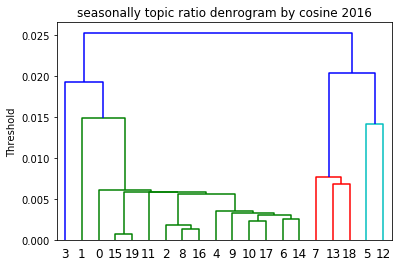

In [56]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import sys
import csv
import math

#ar = np.zeros((200, 10, 12)) # 200トピック10年分12カ月で仮置き
ar = np.zeros((20, 4)) # 一年分

df = pd.read_csv("season.csv")

offset = 4
label = []
rate = []
for i in range(20):
    d = df["{}".format(i)]
    label.append("{}".format(i))
    l = []
    for j in range(offset, offset + 4):
        l.append(d[j])
    rate.append(l)

result = linkage(rate, metric = 'cosine', method = 'single')
dendrogram(result,labels=label)
plt.title("seasonally topic ratio denrogram by cosine 2016")
plt.ylabel("Threshold")
plt.show() 

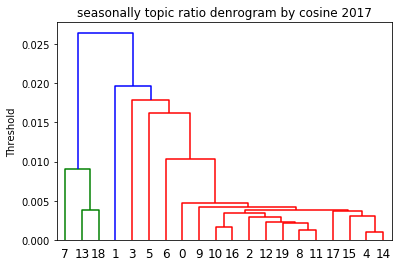

In [57]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import sys
import csv
import math

#ar = np.zeros((200, 10, 12)) # 200トピック10年分12カ月で仮置き
ar = np.zeros((20, 4)) # 一年分

df = pd.read_csv("season.csv")

offset = 8
label = []
rate = []
for i in range(20):
    d = df["{}".format(i)]
    label.append("{}".format(i))
    l = []
    for j in range(offset, offset + 4):
        l.append(d[j])
    rate.append(l)

result = linkage(rate, metric = 'cosine', method = 'single')
dendrogram(result,labels=label)
plt.title("seasonally topic ratio denrogram by cosine 2017")
plt.ylabel("Threshold")
plt.show() 